# Dogs Gone Sideways

### Content
This dataset contains a small subset of images from the Kaggle Dogs vs Cats competition.

Approximately half of the images have been rotated 90 degrees (clockwise). This is used as an exercise to build a deep learning model that can tell whether an image is upright or sideways, and that exercise is part of the Deep Learning Education program.

The data is divided into a directory of training data and a directory of validation data. Each of those directories is subdivided into a directory of sideways (rotated) images and a directory of upright (unrotated) images.

Images are selected based on having an aspect ratio between 0.85 and 1.2, as well as a height of at least 200 pixels.

In [1]:
#kaggle link:https://www.kaggle.com/dansbecker/dogs-gone-sideways

In [2]:
#importing Libraires

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import random
import math
import tensorflow as tf
#Rest of the libraires will be imported, wherever necessary

In [4]:
#ImageDataGenerator (Real time Data Augementation)

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:
Datagen=ImageDataGenerator(shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,#as the dataset is about Sideways we have kept it false
    vertical_flip=False,#as the dataset is about Sideways we have kept it false
    rescale=1.0/255,
    rotation_range=0,#as the dataset is about Sideways we have kept it 0
    validation_split=0.85)

In [7]:
train_set=Datagen.flow_from_directory(directory='D:\\M. Tech in Data Science & Machine Learning\\Deep Learning\\Sem Preparation\\Dogs Gone Sideways\\train\\',
    target_size=(50, 50),
    color_mode='rgb',
    batch_size=30,
    seed=2)

Found 220 images belonging to 2 classes.


In [8]:
valid_set=Datagen.flow_from_directory(directory='D:\\M. Tech in Data Science & Machine Learning\\Deep Learning\\Sem Preparation\\Dogs Gone Sideways\\val\\',
    target_size=(50, 50),
    color_mode='rgb',
    batch_size=30,
    seed=2,
    subset='validation')

Found 183 images belonging to 2 classes.


In [9]:
#Created an extra set 

In [10]:
test_set=Datagen.flow_from_directory(directory='D:\\M. Tech in Data Science & Machine Learning\\Deep Learning\\Sem Preparation\\Dogs Gone Sideways\\val\\',
    target_size=(50, 50),
    color_mode='rgb',
    batch_size=30,
    seed=2,
    subset='training')

Found 34 images belonging to 2 classes.


In [11]:
#Modelling

In [12]:
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D,Flatten ,Input,GlobalAveragePooling2D

In [13]:
model=Sequential()
model.add(Conv2D(filters=30,kernel_size=(2,2),activation='relu',input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=15,kernel_size=(1,1),activation='relu'))
#model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
M=model.fit(train_set,validation_data=valid_set,batch_size=10,epochs=30,verbose=1)

Epoch 1/30
8/8 [==============================] - 65s 939ms/step - loss: 0.6951 - accuracy: 0.5795 - val_loss: 0.6864 - val_accuracy: 0.5082
Epoch 2/30
8/8 [==============================] - 4s 561ms/step - loss: 0.6911 - accuracy: 0.5102 - val_loss: 0.6851 - val_accuracy: 0.5574
Epoch 3/30
8/8 [==============================] - 4s 576ms/step - loss: 0.6768 - accuracy: 0.6006 - val_loss: 0.6806 - val_accuracy: 0.5519
Epoch 4/30
8/8 [==============================] - 4s 552ms/step - loss: 0.6777 - accuracy: 0.5519 - val_loss: 0.6740 - val_accuracy: 0.5246
Epoch 5/30
8/8 [==============================] - 4s 547ms/step - loss: 0.6675 - accuracy: 0.5772 - val_loss: 0.6691 - val_accuracy: 0.6667
Epoch 6/30
8/8 [==============================] - 4s 536ms/step - loss: 0.6508 - accuracy: 0.7038 - val_loss: 0.6623 - val_accuracy: 0.5628
Epoch 7/30
8/8 [==============================] - 4s 536ms/step - loss: 0.6461 - accuracy: 0.6212 - val_loss: 0.6565 - val_accuracy: 0.5738
Epoch 8/30
8/8 [===

In [16]:
model.evaluate(test_set)

2/2 [==============================] - 0s 38ms/step - loss: 0.4341 - accuracy: 0.9118


[0.4340518116950989, 0.9117646813392639]

In [17]:
def plot_performance1(model):
    plt.figure(figsize=(10,5))
    plt.plot(model.history['accuracy'],'b',label='Train Accuracy')
    plt.plot(model.history['val_accuracy'],'y',label='Validation Accuracy')
    plt.legend()
    plt.title('Train and Validation accuracy vs Epochs')
    plt.show()

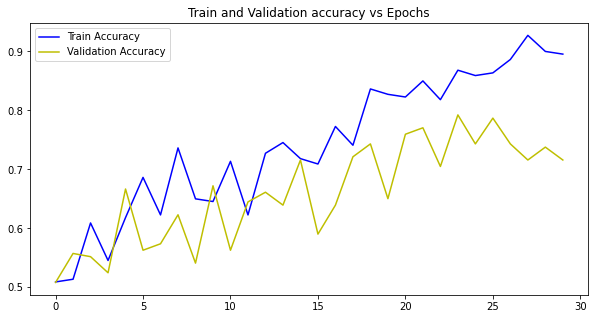

In [18]:
plot_performance1(M)

In [19]:
def plot_performance2(model):
    plt.figure(figsize=(10,5))
    plt.plot(model.history['loss'],'b--',label='Train loss')
    plt.plot(model.history['val_loss'],'y--',label='Validation loss')
    plt.legend()
    plt.title('Train and Validation loss vs Epochs')
    plt.show()

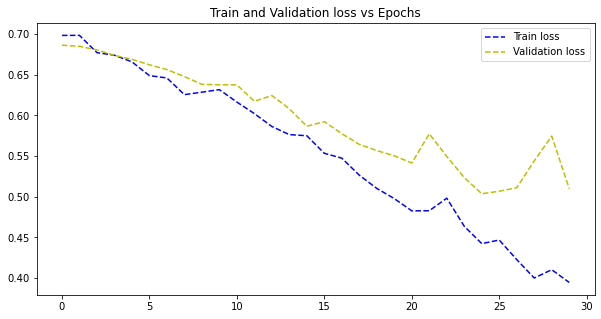

In [20]:
plot_performance2(M)

In [21]:
#Saving the weights of the model

In [22]:
model.save('Dog_Gone_sideways_model.hdf5')#saving the weights of the model

In [23]:
#loading the saved model to predict

In [24]:
from keras.models import load_model

In [25]:
model_load=load_model('Dog_Gone_sideways_model.hdf5')

In [26]:
model_load.evaluate(test_set)

2/2 [==============================] - 1s 39ms/step - loss: 0.5101 - accuracy: 0.8235


[0.5101183652877808, 0.8235294222831726]

In [27]:
#Predicting on test image

In [28]:
from PIL import Image
from skimage import transform

In [29]:
#Lets select a image from the sideways class and check the prediction

In [30]:
image_path='D:\\M. Tech in Data Science & Machine Learning\\Deep Learning\\Sem Preparation\\Dogs Gone Sideways\\val\\sideways\\dog.906.jpg'
image_test=Image.open(image_path)
np_image=np.array(image_test).astype('float32')/255
np_image=transform.resize(np_image,(50,50,3))
np_image=np.expand_dims(np_image,axis =0)

In [31]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [32]:
valid_dataset=image_dataset_from_directory(directory='D:\\M. Tech in Data Science & Machine Learning\\Deep Learning\\Sem Preparation\\Dogs Gone Sideways\\val\\')

Found 217 files belonging to 2 classes.


In [33]:
class_name=valid_dataset.class_names
class_name

['sideways', 'upright']

In [34]:
label=model_load.predict(np_image)
print('The label for this class is ',class_name[label.argmax()])

The label for this class is  sideways


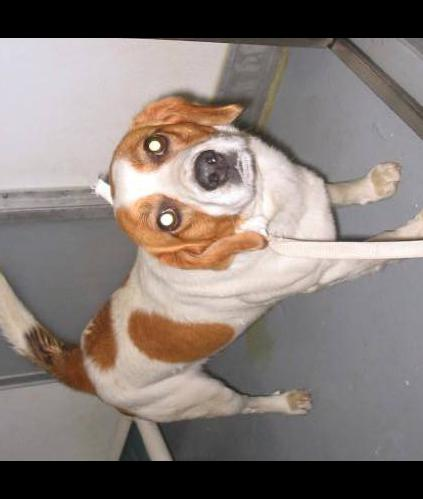

In [35]:
from IPython.display import Image
Image(image_path)

In [36]:
#we can see we have predicted the correct class

In [37]:
#------------------------------------------------------------------------------------------------------------------------#